In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
(X_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train.shape
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

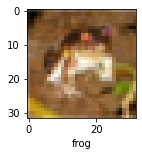

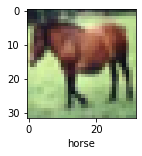

In [ ]:
classes = ["airplane", "automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

plot_sample(X_train,y_train,0)  
plot_sample(X_train,y_train,7)

In [ ]:
X_train = X_train /255
X_test = x_test / 255



In [ ]:
ann= models.Sequential([
layers.Flatten(input_shape=(32,32,3)),
layers.Dense(3000, activation='relu'),
layers.Dense(1000, activation='relu'),
layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='SGD',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.8081 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 105s 67ms/step - loss: 1.6254 - accuracy: 0.4264
Epoch 3/5
1563/1563 [==============================] - 104s 66ms/step - loss: 1.5422 - accuracy: 0.4540
Epoch 4/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4842 - accuracy: 0.4768
Epoch 5/5
1563/1563 [==============================] - 103s 66ms/step - loss: 1.4337 - accuracy: 0.4952


In [ ]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 9s 27ms/step - loss: 1.6882 - accuracy: 0.4106


[1.6881709098815918, 0.4106000065803528]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes= [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.12      0.99      0.22      1000
           1       0.08      0.12      0.10      1000
           2       0.21      0.04      0.07      1000
           3       0.24      0.06      0.10      1000
           4       0.43      0.01      0.01      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.12     10000
   macro avg       0.11      0.12      0.05     10000
weighted avg       0.11      0.12      0.05     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cnn = models.Sequential([
      # cnn
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
      #dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 67s 42ms/step - loss: 1.4523 - accuracy: 0.4793
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1177 - accuracy: 0.6086
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9900 - accuracy: 0.6558
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9177 - accuracy: 0.6833
Epoch 5/10
1563/1563 [==============================] - 66s 43ms/step - loss: 0.8558 - accuracy: 0.7039
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8046 - accuracy: 0.7214
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7623 - accuracy: 0.7368
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7237 - accuracy: 0.7496
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6822 - accuracy: 0.7636
Epoch 10/10
1563/1563 [==============================] - 63s 41m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.9241 - accuracy: 0.6969


[0.9240754842758179, 0.6969000101089478]

In [ ]:
y_test= y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

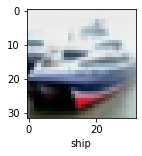

In [ ]:

plot_sample(X_test, y_test, 1)

In [ ]:
y_pred = cnn.predict(x_test)
y_pred[:5]

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [8.576357e-05, 9.999143e-01, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 2.612703e-13,
        0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [ ]:
y_classes =[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 1, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
classes[y_classes[3]]

'airplane'

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.29      0.92      0.44      1000
           1       0.62      0.75      0.68      1000
           2       0.70      0.13      0.22      1000
           3       0.36      0.30      0.33      1000
           4       0.77      0.07      0.12      1000
           5       0.53      0.45      0.49      1000
           6       0.78      0.31      0.45      1000
           7       0.53      0.64      0.58      1000
           8       0.48      0.44      0.46      1000
           9       0.54      0.59      0.56      1000

    accuracy                           0.46     10000
   macro avg       0.56      0.46      0.43     10000
weighted avg       0.56      0.46      0.43     10000

